# Figures

This notebook generates a figure on allele frequency trajectories for two *SLC22A10* proxy variants. First, load the packages and change the directory.

In [1]:
library(cowplot)
library(dplyr)
library(ggplot2)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
setwd('/wynton/group/capra/projects/SLC22A10/figures')

Load the data and create bins based on sample age.

In [3]:
full_coverage_rs1790218_proxy_variant_genotypes <- read.csv('/wynton/group/capra/projects/SLC22A10/data/full_coverage_rs1790218_proxy_variant_genotypes.txt', header = TRUE, sep = '\t')
full_coverage_rs1790218_proxy_variant_genotypes$rsID <- as.factor(full_coverage_rs1790218_proxy_variant_genotypes$rsID)
full_coverage_rs1790218_proxy_variant_genotypes$location <- as.factor(full_coverage_rs1790218_proxy_variant_genotypes$location)
head(full_coverage_rs1790218_proxy_variant_genotypes)

,rsID,sample_ID,sample,date,location,subregion,region,gt
,<fct>,<chr>,<chr>,<dbl>,<fct>,<chr>,<chr>,<int>
1,rs1783634,NE30,Ne30_genotyping_noUDG,9896,China_AmurRiver_EarlyN,East Asia,Asia,1
2,rs1783634,NE61,Ne61_genotyping_noUDG,3421,China_AmurRiver_BA,East Asia,Asia,1
3,rs1783634,NE35,Ne35_genotyping_noUDG,8990,China_AmurRiver_EarlyN,East Asia,Asia,1
4,rs1783634,I13833,I13833,325,Albania_EarlyModern_oCaucasus,Eastern Europe,Europe,2
5,rs1783634,I13487,CAO009013,1329,Cuba_CanimarAbajo_Archaic,Americas,Americas,0
6,rs1783634,I0231,I0231,4844,Russia_Samara_EBA_Yamnaya,Northern Asia,Asia,0


In [4]:
binned_dates_bounds_recent <- seq(0, 10000, by = 1000)

In [5]:
binned_dates_bounds_recent

[1]     0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000

In [6]:
binned_dates_bounds_recent <- seq(0, 9000, by = 1000)
binned_dates_bounds_older <- seq(10000, 50000, by = 5000)
binned_dates_bounds <- c(binned_dates_bounds_recent, binned_dates_bounds_older)
binned_dates_bounds

[1]     0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 15000
[13] 20000 25000 30000 35000 40000 45000 50000

Add these bins to the dataframe.

In [7]:
binned_dates_labels <- paste0(1:18)
full_coverage_rs1790218_proxy_variant_genotypes$binned_dates <- cut(full_coverage_rs1790218_proxy_variant_genotypes$date, breaks = binned_dates_bounds, labels = binned_dates_labels, include.lowest = TRUE)
full_coverage_rs1790218_proxy_variant_genotypes$binned_dates <- as.numeric(full_coverage_rs1790218_proxy_variant_genotypes$binned_dates)
head(full_coverage_rs1790218_proxy_variant_genotypes)

,rsID,sample_ID,sample,date,location,subregion,region,gt,binned_dates
,<fct>,<chr>,<chr>,<dbl>,<fct>,<chr>,<chr>,<int>,<dbl>
1,rs1783634,NE30,Ne30_genotyping_noUDG,9896,China_AmurRiver_EarlyN,East Asia,Asia,1,10
2,rs1783634,NE61,Ne61_genotyping_noUDG,3421,China_AmurRiver_BA,East Asia,Asia,1,4
3,rs1783634,NE35,Ne35_genotyping_noUDG,8990,China_AmurRiver_EarlyN,East Asia,Asia,1,9
4,rs1783634,I13833,I13833,325,Albania_EarlyModern_oCaucasus,Eastern Europe,Europe,2,1
5,rs1783634,I13487,CAO009013,1329,Cuba_CanimarAbajo_Archaic,Americas,Americas,0,2
6,rs1783634,I0231,I0231,4844,Russia_Samara_EBA_Yamnaya,Northern Asia,Asia,0,5


Calculate allele frequencies by region and time bin.

In [8]:
full_coverage_rs1790218_proxy_variant_genotypes_summary <- full_coverage_rs1790218_proxy_variant_genotypes %>% group_by(rsID, binned_dates, region) %>% summarise(sample_size = n(), allele_frequency = 1 - (sum(gt)/(n() * 2))) %>% filter(sample_size != 0, region != 'NaN') %>% drop_na()
head(full_coverage_rs1790218_proxy_variant_genotypes_summary)

`summarise()` has grouped output by 'rsID', 'binned_dates'. You can override using the `.groups` argument.


rsID,binned_dates,region,sample_size,allele_frequency
<fct>,<dbl>,<chr>,<int>,<dbl>
rs1201559,1,Africa,658,0.2796353
rs1201559,1,Americas,841,0.4351962
rs1201559,1,Asia,1507,0.4757797
rs1201559,1,Europe,885,0.5350282
rs1201559,1,Oceania,38,0.3157895
rs1201559,2,Africa,7,0.0000000


In [9]:
binned_dates_plot_labels = c('[50-45)','[45-40)','[40-35)','[35-30)','[30-25)','[25-20)','[20-15)','[15-10)','[10-9)','[9-8)','[8-7)','[7-6)','[6-5)','[5-4)','[4-3)','[3-2)','[2-1)','[1-0]')

In [10]:
length(binned_dates_bounds)

[1] 19

In [11]:
length(binned_dates_plot_labels)

[1] 18

Set a figure theme and a color palette.

In [12]:
figure_theme <- theme_classic() + theme(plot.title = element_text(hjust = 0.5, size = 20)) + 
theme(axis.title = element_text(size = 20), axis.text.x = element_text(size = 18), axis.text.y = element_text(size = 18)) +
theme(legend.position = 'none')

In [13]:
continent_colors <- c('#b24745','#df8f44','#79af98','#00a1d5','#6a6599')

Now make two plots with legends so that we can extract those legends for the final plot. We want to indicate the continent/region using color and sample size using size.

Warning message:
“Ignoring unknown parameters: show_legend”


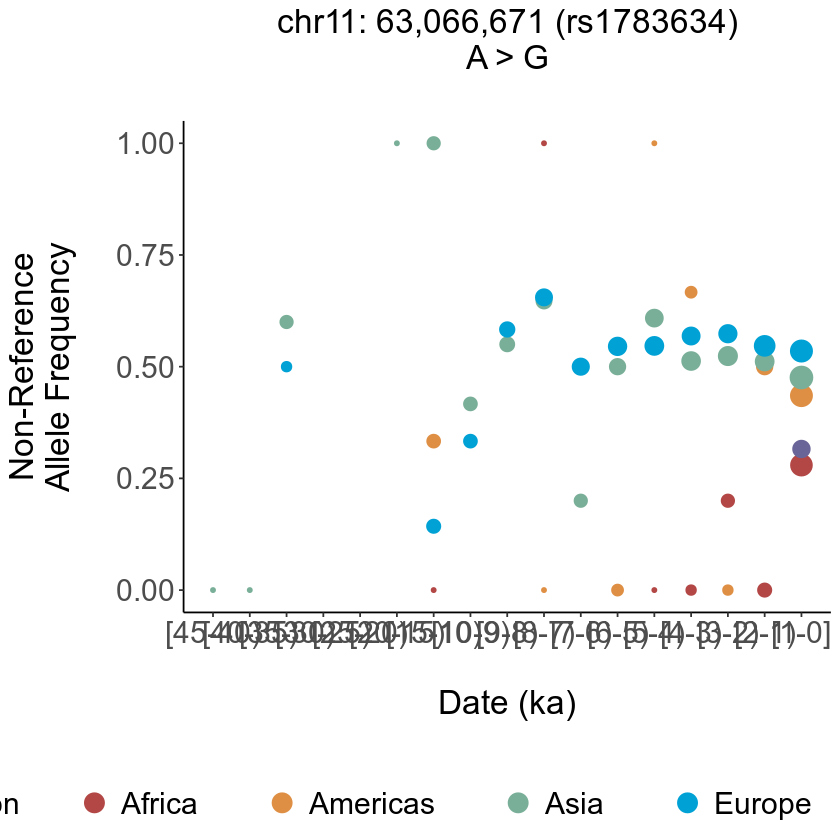

In [14]:
rs1783634_allele_frequency_by_date_color <- ggplot(data = subset(full_coverage_rs1790218_proxy_variant_genotypes_summary, rsID == 'rs1201559'), aes(x = binned_dates, y = allele_frequency, group = region)) + 
geom_point(aes(color = region, size = log2(sample_size)), show_legend = FALSE) + scale_color_manual(values = continent_colors) +
scale_size(name = 'Sample Size', breaks = c(0,3,6,9), labels = c('1','8','64','512')) +
ggtitle('chr11: 63,066,671 (rs1783634)\nA > G\n') + xlab('\nDate (ka)\n') + ylab('Non-Reference\nAllele Frequency\n') +
scale_x_reverse(breaks = 18:1, labels = binned_dates_plot_labels) + coord_cartesian(ylim = c(0, 1)) + 
figure_theme + theme(legend.title = element_text(size = 18), legend.text = element_text(size = 18, margin = margin(r = 35, unit = 'pt')), legend.spacing.x = unit(0.16, 'cm')) +
theme(legend.position = 'bottom') + guides(size = 'none', color = guide_legend(override.aes = list(shape = 20, size = 8), title = 'Region      '))

rs1783634_allele_frequency_by_date_color

Warning message:
“Ignoring unknown parameters: show_legend”


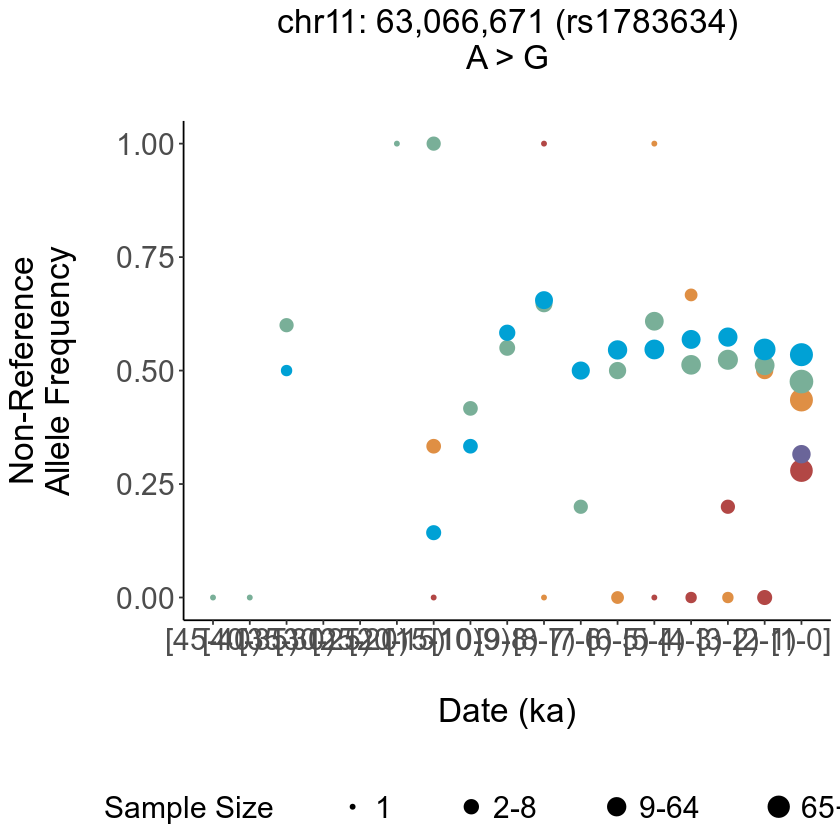

In [15]:
rs1783634_allele_frequency_by_date_size <- ggplot(data = subset(full_coverage_rs1790218_proxy_variant_genotypes_summary, rsID == 'rs1201559'), aes(x = binned_dates, y = allele_frequency, group = region)) + 
geom_point(aes(color = region, size = log2(sample_size)), show_legend = FALSE) + scale_color_manual(values = continent_colors) +
scale_size(name = 'Sample Size       ', breaks = c(0,3,6,9), labels = c('1','2-8','9-64','65+')) +
ggtitle('chr11: 63,066,671 (rs1783634)\nA > G\n') +
xlab('\nDate (ka)\n') + ylab('Non-Reference\nAllele Frequency\n') +
scale_x_reverse(breaks = 18:1, labels = binned_dates_plot_labels) +
coord_cartesian(ylim = c(0, 1)) + 
figure_theme + theme(legend.title = element_text(size = 18), legend.text = element_text(size = 18, margin = margin(r = 35, unit = 'pt')), legend.spacing.x = unit(0.16, 'cm')) +
theme(legend.position = 'bottom') + guides(colour = 'none')

rs1783634_allele_frequency_by_date_size

In [16]:
color_legend <- cowplot::get_legend(rs1783634_allele_frequency_by_date_color)
size_legend <- cowplot::get_legend(rs1783634_allele_frequency_by_date_size)

Now plot each SNV without legends.

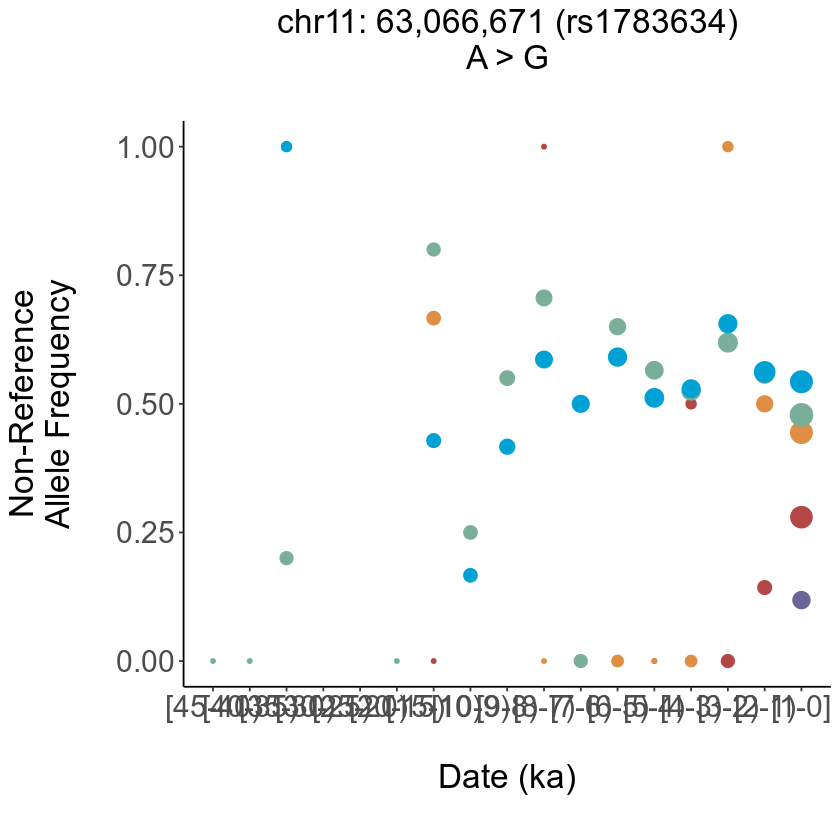

In [17]:
rs1783634_allele_frequency_by_date <- ggplot(data = subset(full_coverage_rs1790218_proxy_variant_genotypes_summary, rsID == 'rs1783634'), aes(x = binned_dates, y = allele_frequency, group = region)) + 
geom_point(aes(color = region, size = log2(sample_size))) + scale_color_manual(values = continent_colors) +
scale_size(name = 'Sample Size', breaks = c(0,3,6,9), labels = c('1','8','64','512')) +
ggtitle('chr11: 63,066,671 (rs1783634)\nA > G\n') +
xlab('\nDate (ka)\n') + ylab('Non-Reference\nAllele Frequency\n') +
scale_x_reverse(breaks = 18:1, labels = binned_dates_plot_labels) +
coord_cartesian(ylim = c(0, 1)) + figure_theme

rs1783634_allele_frequency_by_date

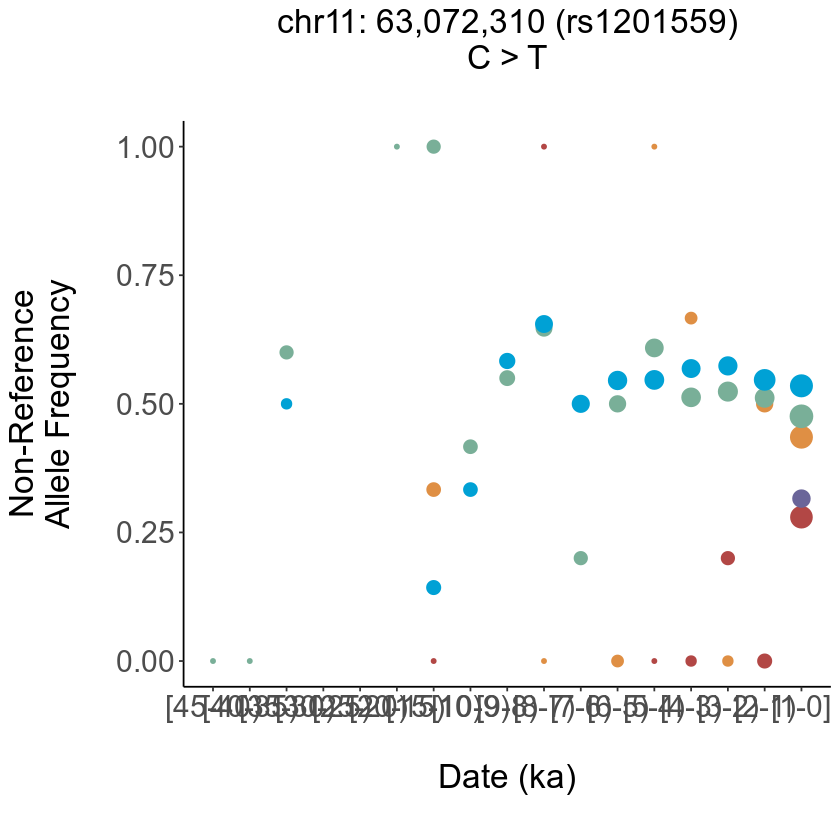

In [18]:
rs1201559_allele_frequency_by_date <- ggplot(data = subset(full_coverage_rs1790218_proxy_variant_genotypes_summary, rsID == 'rs1201559'), aes(x = binned_dates, y = allele_frequency, group = region)) + 
geom_point(aes(color = region, size = log2(sample_size))) + scale_color_manual(values = continent_colors) +
scale_size(name = 'Sample Size', breaks = c(0,3,6,9), labels = c('1','8','64','512')) +
ggtitle('chr11: 63,072,310 (rs1201559)\nC > T\n') +
xlab('\nDate (ka)\n') + ylab('Non-Reference\nAllele Frequency\n') +
scale_x_reverse(breaks = 18:1, labels = binned_dates_plot_labels) +
coord_cartesian(ylim = c(0, 1)) + figure_theme

rs1201559_allele_frequency_by_date

Build and save the multiplot.

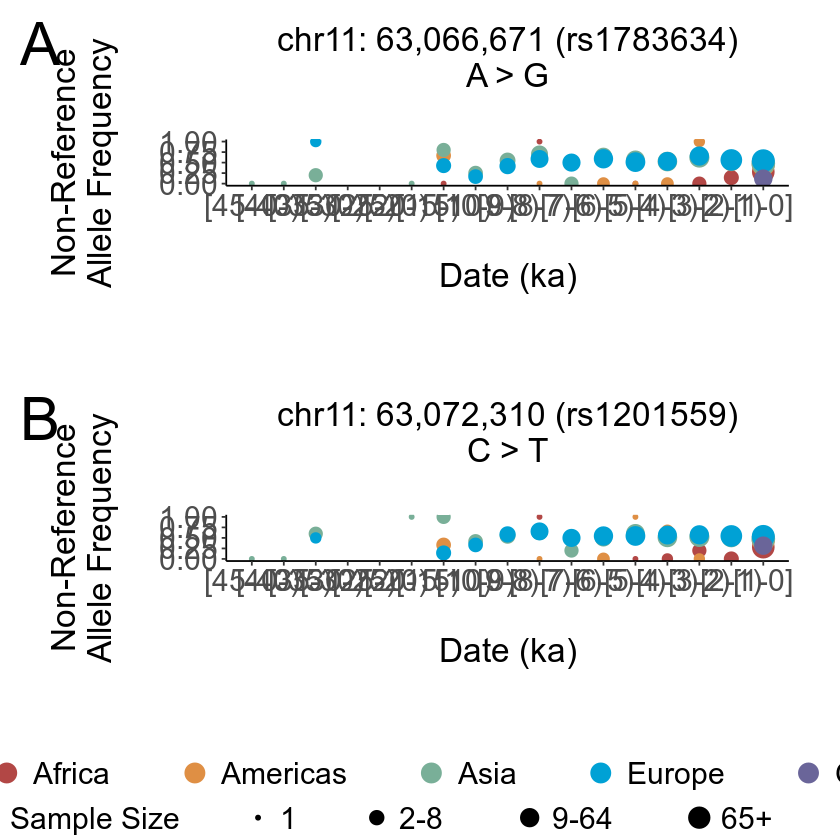

In [19]:
rs1790218_proxy_variant_allele_frequency_trajectories <- plot_grid(rs1783634_allele_frequency_by_date, NULL, rs1201559_allele_frequency_by_date, NULL, color_legend, size_legend, labels = c('A','','B','','',''), label_size = 36, label_fontface = 'plain', ncol = 1, rel_heights = c(0.4,0.02,0.4,0.02,0.05,0.05), scale = 0.9)
rs1790218_proxy_variant_allele_frequency_trajectories

In [20]:
pdf('rs1790218_proxy_variant_allele_frequency_trajectories.pdf', width = 20, height = 15)
rs1790218_proxy_variant_allele_frequency_trajectories
dev.off()

png 
  2